In [1]:
import pandas as pd
import numpy as np
from sksurv.nonparametric import kaplan_meier_estimator as kmf
import matplotlib.pyplot as plt
from lifelines.statistics import logrank_test
import matplotlib.patches as mpatches

In [2]:
selected_cell = 'Bi-Potent Cells'

In [3]:
estimation = pd.read_csv('TCGA-LIHC.Non-immune.csv',index_col=0)
estimation.head()

,Immune cluster,Hepatocytes,Fibroblasts,Endothelial Cells,Bi-Potent Cells,P-value,Correlation,RMSE
Mixture,,,,,,,,
TCGA-FV-A495-01,0.092709,0.722063,0.071203,0.113611,0.000414,0,0.934386,0.706663
TCGA-G3-A3CH-11,0.048158,0.854676,0.013161,0.083858,0.000148,0,0.841028,0.709516
TCGA-CC-A3MB-01,0.240361,0.464779,0.097803,0.196934,0.000123,0,0.847104,0.828112
TCGA-BC-A3KF-01,0.107525,0.691629,0.047043,0.153734,0.000070,0,0.888611,0.737731
TCGA-DD-A4NV-01,0.070443,0.654256,0.077110,0.198085,0.000106,0,0.893133,0.748995


In [4]:
sample_list = [sample for sample in estimation.index.values if '-01' in sample]
estimation = estimation.reindex(sample_list)

In [5]:
survival_data = pd.read_csv('survival_LIHC_survival.txt',index_col=0,delimiter='\t')
sample_list = [sample for sample in survival_data.index.values if '-01' in sample]
survival_data = survival_data.reindex(sample_list)
survival_data.head()

,_PATIENT,OS,OS.time,DSS,DSS.time,DFI,DFI.time,PFI,PFI.time,Redaction
sample,,,,,,,,,,
TCGA-2V-A95S-01,TCGA-2V-A95S,0,NaN,0.0,NaN,0.0,NaN,0,NaN,NaN
TCGA-2Y-A9GS-01,TCGA-2Y-A9GS,1,724.0,1.0,724.0,1.0,102.0,1,102.0,NaN
TCGA-2Y-A9GT-01,TCGA-2Y-A9GT,1,1624.0,1.0,1624.0,1.0,1083.0,1,1083.0,NaN
TCGA-2Y-A9GU-01,TCGA-2Y-A9GU,0,1939.0,0.0,1939.0,0.0,1939.0,0,1939.0,NaN
TCGA-2Y-A9GV-01,TCGA-2Y-A9GV,1,2532.0,1.0,2532.0,0.0,2532.0,1,1745.0,NaN


In [6]:
dfs_data = survival_data.filter(['DFI.time', 'DFI'])
dfs_data = dfs_data.dropna(axis=0,how='any')
binary = {1:True,0:False}
dfs_data['DFS_E'] = [binary[event] for event in dfs_data['DFI']]
dfs_data['DFS_T'] = [time/30 for time in dfs_data['DFI.time']]
dfs_data.head()

,DFI.time,DFI,DFS_E,DFS_T
sample,,,,
TCGA-2Y-A9GS-01,102.0,1.0,True,3.400000
TCGA-2Y-A9GT-01,1083.0,1.0,True,36.100000
TCGA-2Y-A9GU-01,1939.0,0.0,False,64.633333
TCGA-2Y-A9GV-01,2532.0,0.0,False,84.400000
TCGA-2Y-A9GW-01,1229.0,1.0,True,40.966667


In [7]:
survival_test = estimation.merge(dfs_data,left_index=True,right_index=True,how='inner')
survival_test.head()

,Immune cluster,Hepatocytes,Fibroblasts,Endothelial Cells,Bi-Potent Cells,P-value,Correlation,RMSE,DFI.time,DFI,DFS_E,DFS_T
TCGA-FV-A495-01,0.092709,0.722063,0.071203,0.113611,0.000414,0,0.934386,0.706663,1.0,0.0,False,0.033333
TCGA-CC-A3MB-01,0.240361,0.464779,0.097803,0.196934,0.000123,0,0.847104,0.828112,315.0,0.0,False,10.500000
TCGA-BC-A3KF-01,0.107525,0.691629,0.047043,0.153734,0.000070,0,0.888611,0.737731,8.0,0.0,False,0.266667
TCGA-DD-A4NV-01,0.070443,0.654256,0.077110,0.198085,0.000106,0,0.893133,0.748995,2398.0,0.0,False,79.933333
TCGA-BD-A3EP-01,0.219467,0.430477,0.108180,0.240703,0.001173,0,0.677601,0.878487,409.0,0.0,False,13.633333


In [8]:
survival_reorder = survival_test.sort_values(selected_cell,axis=0,ascending=False)
survival_reorder.head()

,Immune cluster,Hepatocytes,Fibroblasts,Endothelial Cells,Bi-Potent Cells,P-value,Correlation,RMSE,DFI.time,DFI,DFS_E,DFS_T
TCGA-FV-A3I0-01,0.337926,0.000000,0.230849,0.297793,0.133433,0,0.826174,0.775769,159.0,1.0,True,5.300000
TCGA-CC-A3MA-01,0.303120,0.071521,0.237433,0.331331,0.056595,0,0.753622,0.904230,261.0,1.0,True,8.700000
TCGA-DD-AA3A-01,0.419995,0.019201,0.218851,0.303316,0.038637,0,0.594306,0.949257,410.0,0.0,False,13.666667
TCGA-YA-A8S7-01,0.429576,0.111925,0.141575,0.288527,0.028397,0,0.623846,0.947881,398.0,1.0,True,13.266667
TCGA-2Y-A9H2-01,0.394377,0.179371,0.140579,0.257743,0.027930,0,0.770786,0.919135,1731.0,0.0,False,57.700000


In [9]:
running_length = len(survival_reorder)

logrank_tests = []
cut_points = []

for i in range(running_length):
    cut_point = int(i+1)
    E = list(survival_reorder['DFS_E'])
    mid_point = int(len(E)/2)
    E_high = E[:cut_point]
    E_low = E[cut_point:]
    S = list(survival_reorder['DFS_T'])
    S_high = S[:cut_point]
    S_low = S[cut_point:]
    results = logrank_test(S_high,S_low,E_high,E_low)
    p = results.p_value
    cut_points.append(cut_point)
    logrank_tests.append(p)

optimization = pd.DataFrame(logrank_tests,index=cut_points,columns=['Log Rank Test'])

In [10]:
optimization = optimization.dropna()
optimization = optimization.sort_values('Log Rank Test')
optimization = int(optimization.iloc[0].name)
optimization

117

In [11]:
dfs_cut_level = survival_reorder[selected_cell][optimization]
dfs_cut_level

0.0009658354662341641

In [12]:
E = list(survival_reorder['DFS_E'])
cut_point = optimization
E_high = E[:cut_point]
E_low = E[cut_point:]
S = list(survival_reorder['DFS_T'])
S_high = S[:cut_point]
S_low = S[cut_point:]
results = logrank_test(S_high,S_low,E_high,E_low)
p = results.p_value
p = round(p,5)
p

0.00035

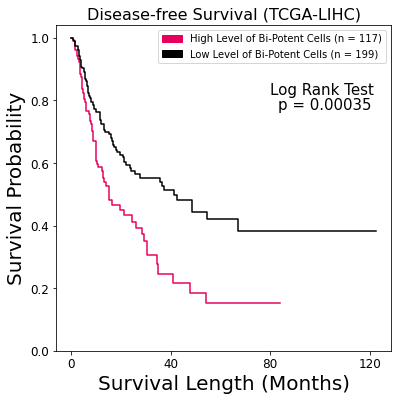

In [13]:
plt.figure(figsize=(6,6))
t,s = kmf(E_high, S_high)
plt.step(t,s,c='#e6005c')
t,s = kmf(E_low, S_low)
plt.step(t,s,c='k')
plt.xticks(np.arange(0,121,40),fontsize=12)
plt.yticks(np.arange(0,1.1,0.2),fontsize=12)
plt.xlabel('Survival Length (Months)', fontsize=20)
plt.ylabel('Survival Probability',fontsize=20)
high_patch = mpatches.Patch(color='#e6005c',label='High Level of Bi-Potent Cells (n = %s)'%len(E_high))
low_patch = mpatches.Patch(color='k',label='Low Level of Bi-Potent Cells (n = %s)'%len(E_low))
plt.text(80,0.82, 'Log Rank Test',fontsize=15)
plt.text(83,0.77, 'p = %s'%p,fontsize=15)
plt.legend(handles=[high_patch,low_patch],fontsize=10)
plt.title('Disease-free Survival (TCGA-LIHC)',fontsize=16)
plt.savefig('TCGA-LIHC.%s.DFS.pdf'%selected_cell,format='pdf')

In [14]:
os_data = survival_data.filter(['OS.time', 'OS'])
os_data = os_data.dropna(axis=0,how='any')
binary = {1:True,0:False}
os_data['OS_E'] = [binary[event] for event in os_data['OS']]
os_data['OS_T'] = [time/30 for time in os_data['OS.time']]
os_data.head()

,OS.time,OS,OS_E,OS_T
sample,,,,
TCGA-2Y-A9GS-01,724.0,1,True,24.133333
TCGA-2Y-A9GT-01,1624.0,1,True,54.133333
TCGA-2Y-A9GU-01,1939.0,0,False,64.633333
TCGA-2Y-A9GV-01,2532.0,1,True,84.400000
TCGA-2Y-A9GW-01,1271.0,1,True,42.366667


In [15]:
survival_test = estimation.merge(os_data,left_index=True,right_index=True,how='inner')
survival_test.head()

,Immune cluster,Hepatocytes,Fibroblasts,Endothelial Cells,Bi-Potent Cells,P-value,Correlation,RMSE,OS.time,OS,OS_E,OS_T
TCGA-FV-A495-01,0.092709,0.722063,0.071203,0.113611,0.000414,0,0.934386,0.706663,1.0,0,False,0.033333
TCGA-CC-A3MB-01,0.240361,0.464779,0.097803,0.196934,0.000123,0,0.847104,0.828112,315.0,1,True,10.500000
TCGA-BC-A3KF-01,0.107525,0.691629,0.047043,0.153734,0.000070,0,0.888611,0.737731,8.0,0,False,0.266667
TCGA-DD-A4NV-01,0.070443,0.654256,0.077110,0.198085,0.000106,0,0.893133,0.748995,2398.0,0,False,79.933333
TCGA-CC-A1HT-01,0.452148,0.035019,0.152632,0.355295,0.004907,0,0.584952,0.978668,101.0,1,True,3.366667


In [16]:
survival_reorder = survival_test.sort_values(selected_cell,axis=0,ascending=False)
survival_reorder

,Immune cluster,Hepatocytes,Fibroblasts,Endothelial Cells,Bi-Potent Cells,P-value,Correlation,RMSE,OS.time,OS,OS_E,OS_T
TCGA-FV-A3I0-01,0.337926,0.000000,0.230849,0.297793,0.133433,0,0.826174,0.775769,848.0,0,False,28.266667
TCGA-CC-A3MA-01,0.303120,0.071521,0.237433,0.331331,0.056595,0,0.753622,0.904230,303.0,1,True,10.100000
TCGA-CC-5260-01,0.365654,0.000000,0.262951,0.316823,0.054573,0,0.651436,0.924675,87.0,1,True,2.900000
TCGA-BC-A10Q-01,0.410428,0.000000,0.205978,0.337758,0.045836,0,0.544170,0.947443,1135.0,1,True,37.833333
TCGA-DD-AA3A-01,0.419995,0.019201,0.218851,0.303316,0.038637,0,0.594306,0.949257,410.0,1,True,13.666667
...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-DD-AADS-01,0.008079,0.972718,0.000000,0.019179,0.000024,0,0.916486,0.627216,474.0,0,False,15.800000
TCGA-DD-AAEB-01,0.007469,0.894237,0.010656,0.087615,0.000023,0,0.941836,0.638390,478.0,0,False,15.933333
TCGA-DD-A73C-01,0.080839,0.663649,0.059593,0.195897,0.000022,0,0.818019,0.775130,701.0,0,False,23.366667
TCGA-CC-A9FV-01,0.290587,0.000000,0.417437,0.291976,0.000000,0,0.277616,0.989967,0.0,0,False,0.000000


In [17]:
running_length = len(survival_reorder)

logrank_tests = []
cut_points = []

for i in range(running_length):
    cut_point = int(i+1)
    E = list(survival_reorder['OS_E'])
    mid_point = int(len(E)/2)
    E_high = E[:cut_point]
    E_low = E[cut_point:]
    S = list(survival_reorder['OS_T'])
    S_high = S[:cut_point]
    S_low = S[cut_point:]
    results = logrank_test(S_high,S_low,E_high,E_low)
    p = results.p_value
    cut_points.append(cut_point)
    logrank_tests.append(p)

optimization = pd.DataFrame(logrank_tests,index=cut_points,columns=['Log Rank Test'])

In [18]:
optimization = optimization.dropna()
optimization = optimization.sort_values('Log Rank Test')
optimization = int(optimization.iloc[0].name)
optimization

104

In [19]:
os_cut_level = survival_reorder[selected_cell][optimization]
os_cut_level

0.00232424811355861

In [20]:
E = list(survival_reorder['OS_E'])
cut_point = optimization
E_high = E[:cut_point]
E_low = E[cut_point:]
S = list(survival_reorder['OS_T'])
S_high = S[:cut_point]
S_low = S[cut_point:]
results = logrank_test(S_high,S_low,E_high,E_low)
p = results.p_value
p = round(p,5)
p

0.0

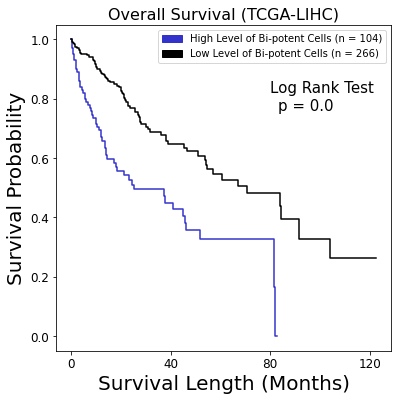

In [21]:
plt.figure(figsize=(6,6))
t,s = kmf(E_high, S_high)
plt.step(t,s,c='#3333cc')
t,s = kmf(E_low, S_low)
plt.step(t,s,c='k')
plt.xticks(np.arange(0,121,40),fontsize=12)
plt.yticks(np.arange(0,1.1,0.2),fontsize=12)
plt.xlabel('Survival Length (Months)', fontsize=20)
plt.ylabel('Survival Probability',fontsize=20)
high_patch = mpatches.Patch(color='#3333cc',label='High Level of Bi-potent Cells (n = %s)'%len(E_high))
low_patch = mpatches.Patch(color='k',label='Low Level of Bi-potent Cells (n = %s)'%len(E_low))
plt.text(80,0.82, 'Log Rank Test',fontsize=15)
plt.text(83,0.76, 'p = %s'%p,fontsize=15)
plt.legend(handles=[high_patch,low_patch],fontsize=10)
plt.title('Overall Survival (TCGA-LIHC)',fontsize=16)
plt.savefig('TCGA-LIHC.%s.OS.pdf'%selected_cell,format='pdf')

In [22]:
estimation = estimation.sort_values(selected_cell,ascending=False)
x = []
y = []
for key,value in enumerate(estimation[selected_cell]):
    x.append(key)
    y.append(value)

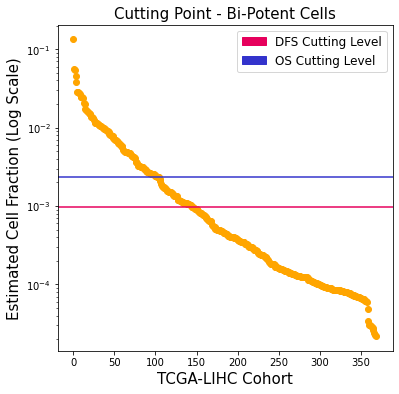

In [25]:
plt.figure(figsize=(6,6))
plt.scatter(x,y,color='orange')
plt.axhline(y=os_cut_level, xmin=0, xmax=100,color='#3333cc')
plt.axhline(y=dfs_cut_level, xmin=0, xmax=100,color='#e6005c')
plt.ylabel('Estimated Cell Fraction (Log Scale)',fontsize=15)
plt.xlabel('TCGA-LIHC Cohort',fontsize=15)
plt.title('Cutting Point - %s'%selected_cell,fontsize=15)
dfs_patch = mpatches.Patch(color='#e6005c',label='DFS Cutting Level')
os_patch = mpatches.Patch(color='#3333cc',label='OS Cutting Level')
plt.legend(handles=[dfs_patch,os_patch],fontsize=12)
plt.yscale("log")
plt.savefig('Cutting_Point.%s'%selected_cell,format='pdf')